In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.metrics as metrics
import idx2numpy

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# Import Warnings
import warnings
warnings.simplefilter(action="ignore")

# Setting Configurations:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# for data splitting, transforming and model training
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
labels = idx2numpy.convert_from_file('./data/train-labels.idx1-ubyte')
images = idx2numpy.convert_from_file('./data/train-images.idx3-ubyte')

# Flatten the images
flattened_images = images.reshape(images.shape[0], -1)

# Create a DataFrame for the images with one column per pixel
images_df = pd.DataFrame(flattened_images)

# Create a DataFrame for the labels
labels_df = pd.DataFrame(labels, columns=['label'])

# Concatenate the two DataFrames along the axis 1 (column-wise)
data = pd.concat([labels_df, images_df], axis=1)

data.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 783
dtypes: uint8(785)
memory usage: 44.9 MB


In [4]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

label:
	 Mean = 4.45
	 Standard deviation = 2.89
	 Minimum = 0.00
	 Maximum = 9.00
0:
	 Mean = 0.00
	 Standard deviation = 0.00
	 Minimum = 0.00
	 Maximum = 0.00
1:
	 Mean = 0.00
	 Standard deviation = 0.00
	 Minimum = 0.00
	 Maximum = 0.00
2:
	 Mean = 0.00
	 Standard deviation = 0.00
	 Minimum = 0.00
	 Maximum = 0.00
3:
	 Mean = 0.00
	 Standard deviation = 0.00
	 Minimum = 0.00
	 Maximum = 0.00
4:
	 Mean = 0.00
	 Standard deviation = 0.00
	 Minimum = 0.00
	 Maximum = 0.00
5:
	 Mean = 0.00
	 Standard deviation = 0.00
	 Minimum = 0.00
	 Maximum = 0.00
6:
	 Mean = 0.00
	 Standard deviation = 0.00
	 Minimum = 0.00
	 Maximum = 0.00
7:
	 Mean = 0.00
	 Standard deviation = 0.00
	 Minimum = 0.00
	 Maximum = 0.00
8:
	 Mean = 0.00
	 Standard deviation = 0.00
	 Minimum = 0.00
	 Maximum = 0.00
9:
	 Mean = 0.00
	 Standard deviation = 0.00
	 Minimum = 0.00
	 Maximum = 0.00
10:
	 Mean = 0.00
	 Standard deviation = 0.00
	 Minimum = 0.00
	 Maximum = 0.00
11:
	 Mean = 0.00
	 Standard deviation = 0.00
	

In [5]:
data.isnull().sum() # Checking for missing values

label    0
0        0
1        0
2        0
3        0
        ..
779      0
780      0
781      0
782      0
783      0
Length: 785, dtype: int64

In [6]:
duplicates = data[data.duplicated()]
print("Number of duplicates:", len(duplicates))

Number of duplicates: 0


In [7]:
data.describe() # Checking for outliers

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
count,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,6

In [8]:
data.dtypes # Checking for the data types

label    uint8
0        uint8
1        uint8
2        uint8
3        uint8
         ...  
779      uint8
780      uint8
781      uint8
782      uint8
783      uint8
Length: 785, dtype: object

In [9]:
data.shape # Checking for the shape of the dataset

(60000, 785)

In [10]:
data.select_dtypes(include=[np.number]).corr() # Checking for the correlation
#If you're building a predictive model, highly correlated features can sometimes hurt model performance due
#to multicollinearity. You might consider using only one of a pair of highly correlated variables.

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
label,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002,-0.001,-0.003,-0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002,0.003,0.005,0.006,0.006,0.008,0.010,0.012,0.013,0.014,0.011,0.009,0.007,0.011,0.012,0.010,0.009,0.006,0.004,0.002,NaN,NaN,NaN,NaN,NaN,NaN,0.002,-0.005,0.004,0.004,0.004,0.006,0.008,0.010,0.016,0.021,0.028,0.036,0.043,0.049,0.055,0.058,0.058,0.050,0.040,0.030,0.021,0.011,0.004,0.001,NaN,NaN,NaN,NaN,0.000,-0.001,-0.001,-0.008,-0.010,-0.014,-0.023,-0.031,-0.036,-0.042,-0.044,-0.040,-0.026,-0.011,0.003,0.020,0.032,0.032,0.028,0.025,0.020,0.015,0.010,0.003,0.002,NaN,NaN,-0.002,-0.005,-0.006,-0.011,-0.025,-0.039,-0.057,-0.078,-0.099,-0.119,-0.146,-0.176,-0.201,-0.214,-0.215,-0.202,-0.183,-0.156,-0.131,-0.094,-0.054,-0.022,0.003,0.010,0.011,0.007,0.005,NaN,NaN,-0.002,-0.012,-0.024,-0.043,-0.067,-0.090,-0.113,-0.137,-0.161,-0.183,-0.207,-0.239,-0.265,-0.279,-0.275,-0.256,-0.224,-0.184,-0.133,-0.076,-0.024,0

In [11]:
data.select_dtypes(include=[np.number]).skew() # Calculate the skewness for all columns

label     0.026
0         0.000
1         0.000
2         0.000
3         0.000
          ...  
779     173.489
780       0.000
781       0.000
782       0.000
783       0.000
Length: 785, dtype: float64

In [12]:
data.nunique() # Checking for the unique values

label    10
0         1
1         1
2         1
3         1
         ..
779       3
780       1
781       1
782       1
783       1
Length: 785, dtype: int64

In [13]:
data["label"].value_counts() # Checking for the value counts

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

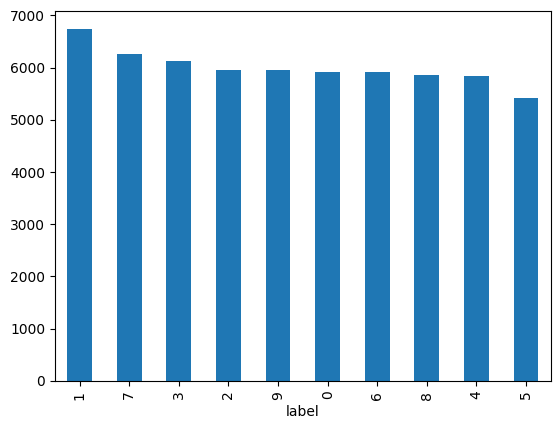

In [14]:
data['label'].value_counts().plot(kind='bar') # Checking for the value counts
plt.show()

In [15]:
labels_test = idx2numpy.convert_from_file('./data/t10k-labels.idx1-ubyte')
images_test = idx2numpy.convert_from_file('./data/t10k-images.idx3-ubyte')

flattened_images_test = images_test.reshape(images_test.shape[0], -1)

test_images_df = pd.DataFrame(flattened_images_test)

test_labels_df = pd.DataFrame(labels_test, columns=['label'])

test = pd.concat([test_labels_df, test_images_df], axis=1)

In [16]:
X_train= data.drop('label', axis=1)  # taking the training data features
y_train=data['label']                                                              # output of our training data
X_test= test.drop('label', axis=1)      # taking test data features
y_test=test['label']     

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from tensorflow.keras import layers, models

# Define the CNN architecture
model = models.Sequential()
# Add a Reshape layer to convert (784,) into (28, 28, 1)
model.add(layers.Reshape((28, 28, 1), input_shape=(784,)))

# downsample to 2x2, to be less sensitive to exact location of features
# flatten so we can connect to dense layer

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # For MNIST digits

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=5, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)

# Make predictions
predictions = model.predict(X_test_scaled)

Epoch 1/5
938/938 [==============================] - 11s 11ms/step - loss: 0.1846 - accuracy: 0.9449
Epoch 2/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0504 - accuracy: 0.9843
Epoch 3/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0368 - accuracy: 0.9885
Epoch 4/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0293 - accuracy: 0.9908
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


In [36]:
import optuna
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers.legacy import Adam

def create_model(trial):
    # Build the model architecture as before, with trial suggestions:
    model = models.Sequential()
    model.add(layers.Reshape((28, 28, 1), input_shape=(784,)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    # Use Optuna to suggest the number of units in the dense layer
    model.add(layers.Dense(trial.suggest_categorical('units', [64, 128, 256, 512]), activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    # Use Optuna to suggest the learning rate
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
    
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def objective(trial):
    # Create and compile model
    model = create_model(trial)

    # Fit model
    model.fit(X_train_scaled, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    
    # Return the accuracy
    return accuracy



In [37]:
study = optuna.create_study(direction='maximize', study_name='cnn-mnist')
study.optimize(objective, n_trials=10)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-03-03 20:47:22,044] A new study created in memory with name: cnn-mnist
[I 2024-03-03 20:48:06,156] Trial 0 finished with value: 0.9815000295639038 and parameters: {'units': 64, 'lr': 0.010937914967878288}. Best is trial 0 with value: 0.9815000295639038.
[I 2024-03-03 20:48:55,597] Trial 1 finished with value: 0.9901000261306763 and parameters: {'units': 256, 'lr': 0.0003049351245542625}. Best is trial 1 with value: 0.9901000261306763.
[I 2024-03-03 20:49:42,828] Trial 2 finished with value: 0.9703999757766724 and parameters: {'units': 64, 'lr': 5.857805113497873e-05}. Best is trial 1 with value: 0.9901000261306763.
[I 2024-03-03 20:50:28,540] Trial 3 finished with value: 0.9872000217437744 and parameters: {'units': 128, 'lr': 0.0004754799026679806}. Best is trial 1 with value: 0.9901000261306763.
[I 2024-03-03 20:51:14,990] Trial 4 finished with value: 0.9706000089645386 and parameters: {'units': 64, 'lr': 0.014069433221211299}. Best is trial 1 with value: 0.9901000261306763.
[

Number of finished trials: 10
Best trial: {'units': 256, 'lr': 0.0003049351245542625}


In [48]:
# Retrieve the best hyperparameters
best_params = study.best_trial.params
print("Best trial parameters: ", best_params)

# Build the model with the best hyperparameters
best_model = models.Sequential()
best_model.add(layers.Reshape((28, 28, 1), input_shape=(784,)))
best_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
best_model.add(layers.MaxPooling2D((2, 2)))
best_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
best_model.add(layers.MaxPooling2D((2, 2)))
best_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
best_model.add(layers.Flatten())
best_model.add(layers.Dense(best_params['units'], activation='relu'))
best_model.add(layers.Dense(10, activation='softmax'))

# Compile the model with the best learning rate
best_model.compile(optimizer=Adam(learning_rate=best_params['lr']),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Assuming you have your training data ready and preprocessed (x_train, y_train)
# Train the model on the full dataset
best_model.fit(X_train_scaled, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Now you can evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

# Use the trained model to make predictions
predictions = best_model.predict(X_test_scaled)

Best trial parameters:  {'units': 256, 'lr': 0.0003049351245542625}
Epoch 1/5
750/750 [==============================] - 10s 13ms/step - loss: 0.3140 - accuracy: 0.9103 - val_loss: 0.0929 - val_accuracy: 0.9727
Epoch 2/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0814 - accuracy: 0.9751 - val_loss: 0.0660 - val_accuracy: 0.9814
Epoch 3/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0567 - accuracy: 0.9822 - val_loss: 0.0530 - val_accuracy: 0.9846
Epoch 4/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0429 - accuracy: 0.9870 - val_loss: 0.0441 - val_accuracy: 0.9875
Epoch 5/5
750/750 [==============================] - 9s 13ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.0423 - val_accuracy: 0.9875
Test Accuracy: 0.9894000291824341, Test Loss: 0.0322582945227623
313/313 [==============================] - 1s 3ms/step


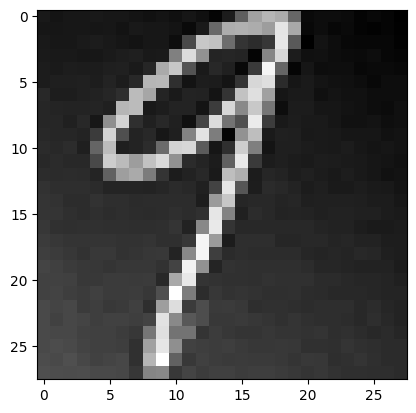

In [111]:
from pillow_heif import register_heif_opener
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# This line registers the HEIC opener with Pillow
register_heif_opener()

def read_heic(file_path):
    # Now you can use Image.open() directly with HEIC files
    image = Image.open(file_path)
    return image

# specify file to test here
file = './sample_pics/9-1.heic'
heic_image = read_heic(file)

# Convert to grayscale
gray_image = heic_image.convert('L')

# The MNIST images have white digits on a black background.
# So, we invert the image if it is black on white.
if np.mean(gray_image) > 128:  # this checks if the image is dark or light
    gray_image = ImageOps.invert(gray_image)

# Resize the image to 28x28 pixels
gray_image = gray_image.resize((28, 28), Image.Resampling.LANCZOS)

# Convert to numpy array
gray_image_np = np.array(gray_image)

# Normalize pixel values to match MNIST dataset (0-255 to 0-1 range)
gray_image_np = gray_image_np / 255.0

plt.imshow(gray_image_np, cmap='gray')
plt.show()


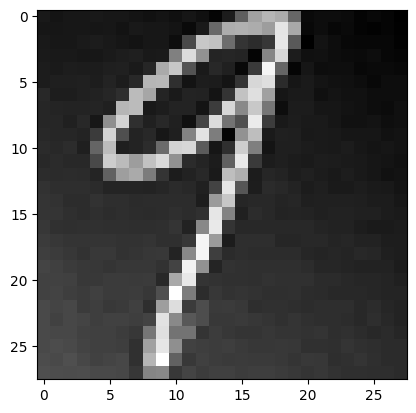

In [112]:
img_resized = cv2.resize(gray_image_np, (28,28), interpolation=cv2.INTER_LINEAR)
#img_resized = cv2.bitwise_not(img_resized)

plt.imshow(img_resized, cmap='gray')

In [113]:
# Reshape your input image to a flat array
img_to_predict = img_resized.flatten().reshape(1, 784)

# Make the prediction
prediction = model.predict(img_to_predict)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 20ms/step
Predicted class: [1]
